In [ ]:
#Import library functions
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn import svm
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
titanic = pd.read_csv('/content/drive/MyDrive/Titanic dataset.csv')

In [ ]:

# Display the first few rows of the dataset
print(titanic.head())

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  


In [ ]:
# Outlier detection using IQR method
def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers


In [ ]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
# Example: Detect outliers in the 'Age' column
age_outliers = detect_outliers(titanic, 'Age')
print("Outliers in Age column:")

print("Outliers: ", age_outliers)



Outliers in Age column:
Outliers:      PassengerId  Survived  Pclass  \
81          973         0       1   
96          988         1       1   

                                                 Name     Sex   Age  SibSp  \
81                                 Straus, Mr. Isidor    male  67.0      1   
96  Cavendish, Mrs. Tyrell William (Julia Florence...  female  76.0      1   

    Parch    Ticket      Fare    Cabin Embarked  
81      0  PC 17483  221.7792  C55 C57        S  
96      0     19877   78.8500      C46        S  


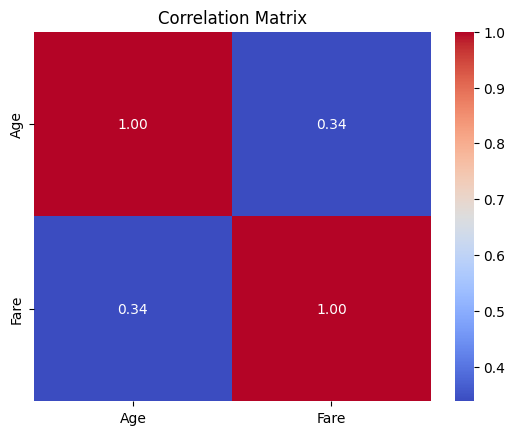

In [ ]:
# Correlation finding for at least 2 columns
correlation_matrix = titanic[['Age', 'Fare']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:


# Check for normal distribution using Shapiro-Wilk test
from scipy.stats import shapiro

def check_normal_distribution(data, column):
    stat, p_value = shapiro(data[column])
    if p_value > 0.05:
        print(f"The {column} column is normally distributed (p-value: {p_value:.4f})")
    else:
        print(f"The {column} column is not normally distributed (p-value: {p_value:.4f})")

# Example: Check for normal distribution in the 'Age' column
check_normal_distribution(titanic, 'Age')

The Age column is normally distributed (p-value: 1.0000)


In [ ]:

# Example: Apply Bayes Theorem on 'Age', 'Fare', and 'Survived' columns
bayes_age, bayes_fare, bayes_survived = apply_bayes_theorem(titanic, 'Age', 'Fare', 'Survived')
print("Bayes Theorem result for Age:")
print(bayes_age)
print("\nBayes Theorem result for Fare:")
print(bayes_fare)
print("\nBayes Theorem result for Survived:")
print(bayes_survived)


Bayes Theorem result for Age:
30.272590361445783

Bayes Theorem result for Fare:
35.627188489208635

Bayes Theorem result for Survived:
0    0.636364
1    0.363636
Name: Survived, dtype: float64


In [ ]:
from scipy.stats import shapiro

def apply_bayes_theorem(data, column1, column2, column3):
    # Your implementation of Bayes Theorem here
    # For illustration purposes, let's assume a basic implementation:
    # Calculate some results based on the input data
    bayes_result_column1 = data[column1].mean()
    bayes_result_column2 = data[column2].mean()
    bayes_result_column3 = data[column3].value_counts(normalize=True)

    # Return the results for each column
    return bayes_result_column1, bayes_result_column2, bayes_result_column3
# Example: Apply Bayes Theorem on 'Age', 'Fare', and 'Survived' columns
# Assuming 'titanic' is your DataFrame containing the data
titanic = pd.read_csv('/content/drive/MyDrive/Titanic dataset.csv')

bayes_age, bayes_fare, bayes_survived = apply_bayes_theorem(titanic, 'Age', 'Fare', 'Survived')
print("Bayes Theorem result for Age:")
print(bayes_age)
print("\nBayes Theorem result for Fare:")
print(bayes_fare)
print("\nBayes Theorem result for Survived:")
print(bayes_survived)



Bayes Theorem result for Age:
30.272590361445783

Bayes Theorem result for Fare:
35.627188489208635

Bayes Theorem result for Survived:
0    0.636364
1    0.363636
Name: Survived, dtype: float64


In [ ]:
from scipy.stats import ttest_ind

# Hypothesis testing on selected variables
def hypothesis_testing(data, column1, column2):
    stat, p_value = ttest_ind(data[column1].dropna(), data[column2].dropna())

    if p_value < 0.05:
        print(f"There is a significant difference between {column1} and {column2} (p-value: {p_value:.4f})")
        print(" reject the hypothesis")
    else:
        print(f"There is no significant difference between {column1} and {column2} (p-value: {p_value:.4f})")
        print("Do not reject")

# Example: Hypothesis testing on 'Age' and 'Fare'
hypothesis_testing(titanic, 'Age', 'Fare')


There is no significant difference between Age and Fare (p-value: 0.0892)
Do not reject


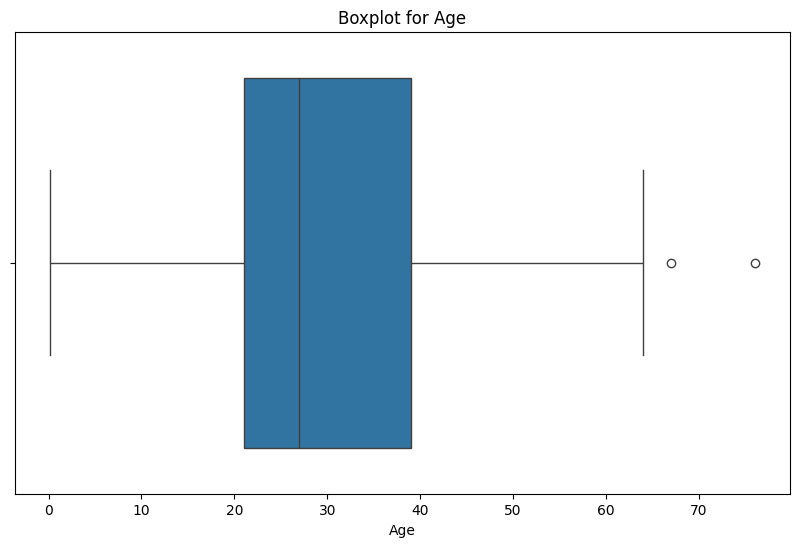

Column: Age
IQR: 18.00
Lower Bound: -6.00
Upper Bound: 66.00
Potential Outliers:
    PassengerId   Age
81          973  67.0
96          988  76.0




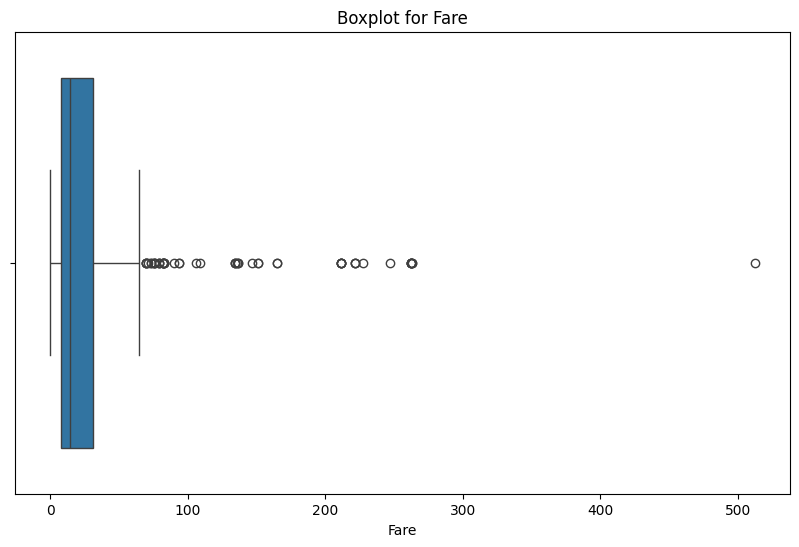

Column: Fare
IQR: 23.60
Lower Bound: -27.51
Upper Bound: 66.91
Potential Outliers:
     PassengerId      Fare
12           904   82.2667
24           916  262.3750
48           940   76.2917
53           945  263.0000
59           951  262.3750
64           956  262.3750
69           961  263.0000
74           966  211.5000
75           967  211.5000
81           973  221.7792
96           988   78.8500
114         1006  221.7792
118         1010   75.2417
141         1033  151.5500
142         1034  262.3750
150         1042   83.1583
156         1048  221.7792
179         1071   83.1583
181         1073   83.1583
184         1076  247.5208
188         1080   69.5500
196         1088  134.5000
202         1094  227.5250
212         1104   73.5000
217         1109  164.8667
218         1110  211.5000
234         1126   71.2833
236         1128   75.2500
239         1131  106.4250
242         1134  134.5000
252         1144  136.7792
270         1162   75.2417
272         1164  136.7792

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define numerical columns for outlier detection
numerical_columns = ['Age', 'Fare']

# Step 1: Calculate the Interquartile Range (IQR)
for column in numerical_columns:
    Q1 = titanic[column].quantile(0.25)
    Q3 = titanic[column].quantile(0.75)
    IQR = Q3 - Q1

    # Step 2: Identify potential outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = titanic[(titanic[column] < lower_bound) | (titanic[column] > upper_bound)]

    # Step 3: Visualize the distribution and potential outliers
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=titanic[column])
    plt.title(f'Boxplot for {column}')
    plt.show()

    print(f"Column: {column}")
    print(f"IQR: {IQR:.2f}")
    print(f"Lower Bound: {lower_bound:.2f}")
    print(f"Upper Bound: {upper_bound:.2f}")
    print(f"Potential Outliers:")
    print(outliers[['PassengerId', column]])
    print("\n" + "="*50 + "\n")
